<a href="https://colab.research.google.com/github/kapilpandey09/ML_project/blob/main/Titanic_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('/content/sample_data/Titanic-Dataset.csv')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df = df.drop_duplicates()

In [5]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
df["Pclass"] = df["Pclass"].astype("category")
df["Sex"] = df["Sex"].astype("category")
df["Embarked"] = df["Embarked"].astype("category")


In [7]:
df["Age"] = df.groupby(["Sex", "Pclass"])["Age"]\
               .transform(lambda x: x.fillna(x.median()))


/tmp/ipython-input-2295706297.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df["Age"] = df.groupby(["Sex", "Pclass"])["Age"]\


In [8]:
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])


In [9]:
df["HasCabin"] = df["Cabin"].notnull().astype(int)


In [10]:
df.drop(["PassengerId", "Ticket", "Cabin"], axis=1, inplace=True)


In [11]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,HasCabin
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S,0
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S,1
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.5,1,2,23.4500,S,0
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C,1


In [12]:
df["Title"] = df["Name"].str.extract(" ([A-Za-z]+)\.", expand=False)

df["Title"] = df["Title"].replace(
    ["Lady", "Countess", "Capt", "Col", "Don", "Dr",
     "Major", "Rev", "Sir", "Jonkheer", "Dona"], "Rare"
)

df["Title"] = df["Title"].replace({
    "Mlle": "Miss",
    "Ms": "Miss",
    "Mme": "Mrs"
})


<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipython-input-2798812080.py:1: SyntaxWarning: invalid escape sequence '\.'
  df["Title"] = df["Name"].str.extract(" ([A-Za-z]+)\.", expand=False)


In [13]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,HasCabin,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,0,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0,Mr
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S,0,Rare
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S,1,Miss
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.5,1,2,23.4500,S,0,Miss
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C,1,Mr


In [14]:
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1
df["IsAlone"] = (df["FamilySize"] == 1).astype(int)


In [15]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,HasCabin,Title,FamilySize,IsAlone
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,0,Mr,2,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1,Mrs,2,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0,Miss,1,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1,Mrs,2,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0,Mr,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S,0,Rare,1,1
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S,1,Miss,1,1
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.5,1,2,23.4500,S,0,Miss,4,0
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C,1,Mr,1,1


In [16]:
df["Fare"] = df["Fare"].fillna(df["Fare"].median())
df["Fare"] = np.log1p(df["Fare"])


In [17]:
Q1 = df["Fare"].quantile(0.25)
Q3 = df["Fare"].quantile(0.75)
IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * IQR
df["Fare"] = np.where(df["Fare"] > upper_limit, upper_limit, df["Fare"])


In [18]:
df.drop(["Name"], axis=1, inplace=True)


In [20]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Survived    891 non-null    int64   
 1   Pclass      891 non-null    category
 2   Sex         891 non-null    category
 3   Age         891 non-null    float64 
 4   SibSp       891 non-null    int64   
 5   Parch       891 non-null    int64   
 6   Fare        891 non-null    float64 
 7   Embarked    891 non-null    category
 8   HasCabin    891 non-null    int64   
 9   Title       891 non-null    object  
 10  FamilySize  891 non-null    int64   
 11  IsAlone     891 non-null    int64   
dtypes: category(3), float64(2), int64(6), object(1)
memory usage: 65.8+ KB


In [22]:
df.isnull().sum()


,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0
HasCabin,0
Title,0


In [23]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,HasCabin,Title,FamilySize,IsAlone
0,0,3,male,22.0,1,0,2.110213,S,0,Mr,2,0
1,1,1,female,38.0,1,0,4.280593,C,1,Mrs,2,0
2,1,3,female,26.0,0,0,2.188856,S,0,Miss,1,1
3,1,1,female,35.0,1,0,3.990834,S,1,Mrs,2,0
4,0,3,male,35.0,0,0,2.202765,S,0,Mr,1,1


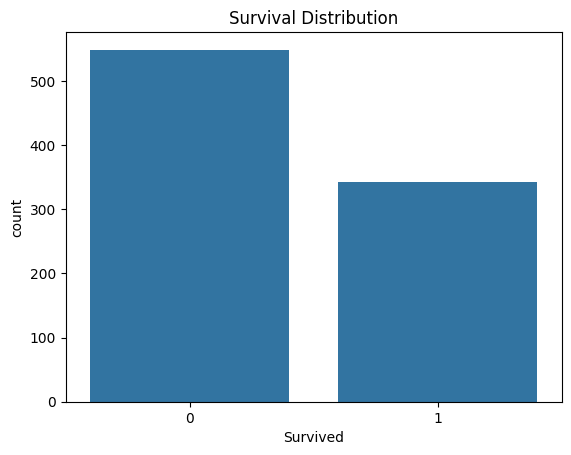

In [24]:
sns.countplot(x="Survived", data=df)
plt.title("Survival Distribution")
plt.show()


In [26]:
df['Survived'].value_counts()

,count
Survived,
0,549
1,342


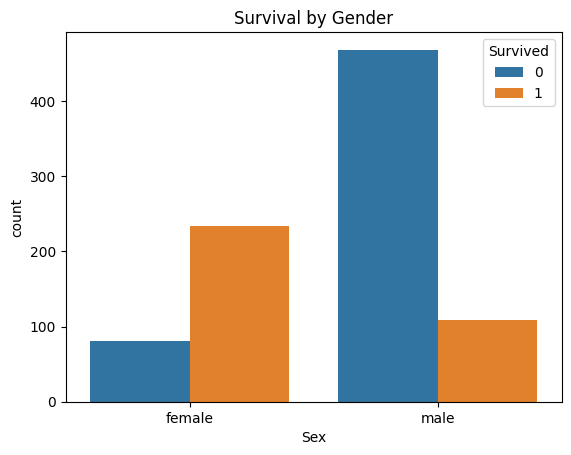

In [27]:
sns.countplot(x="Sex", hue="Survived", data=df)
plt.title("Survival by Gender")
plt.show()


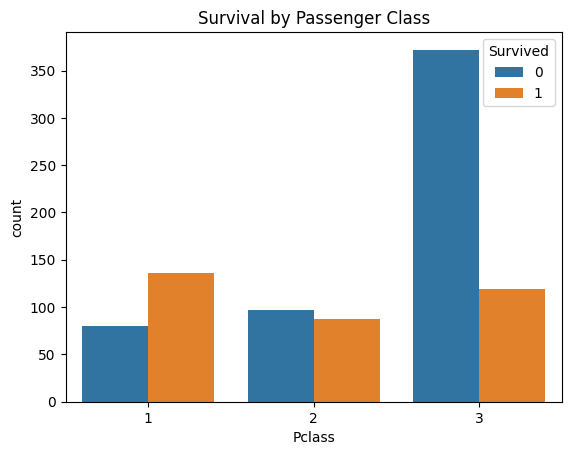

In [28]:
sns.countplot(x="Pclass", hue="Survived", data=df)
plt.title("Survival by Passenger Class")
plt.show()


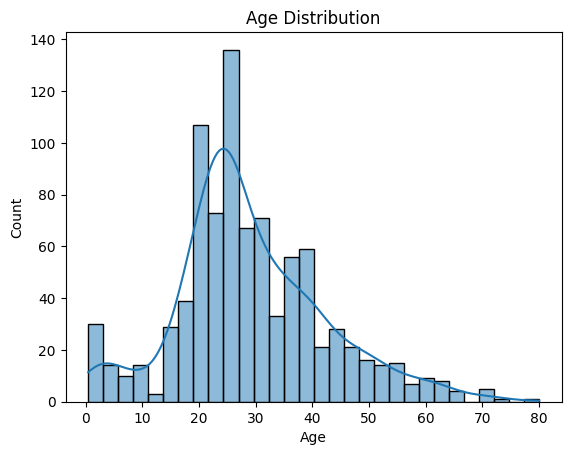

In [29]:
sns.histplot(df["Age"], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()


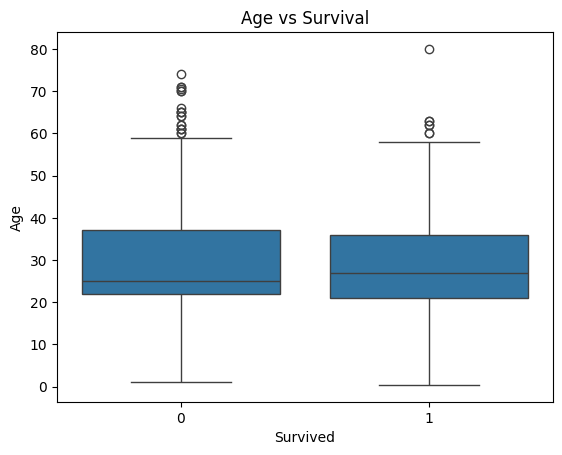

In [30]:
sns.boxplot(x="Survived", y="Age", data=df)
plt.title("Age vs Survival")
plt.show()


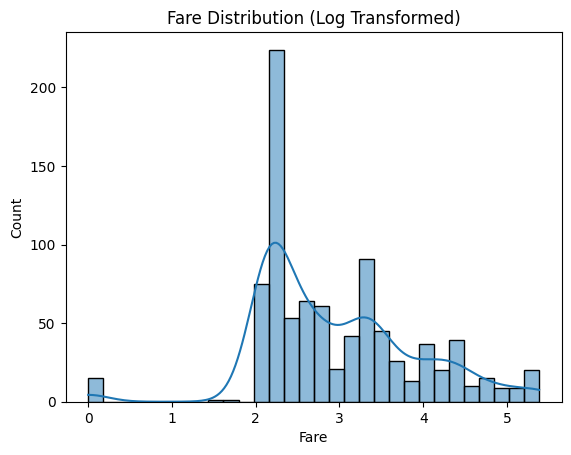

In [31]:
sns.histplot(df["Fare"], bins=30, kde=True)
plt.title("Fare Distribution (Log Transformed)")
plt.show()


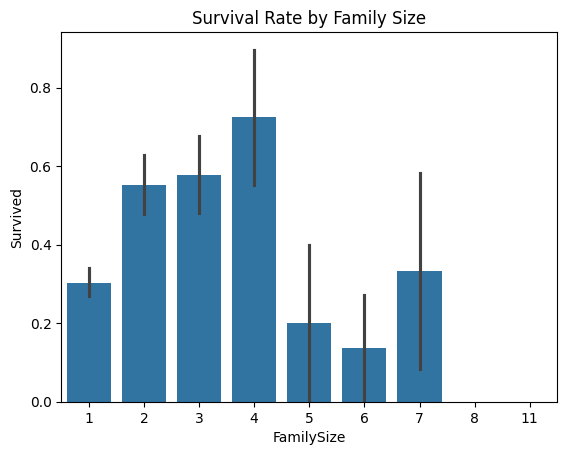

In [32]:
sns.barplot(x="FamilySize", y="Survived", data=df)
plt.title("Survival Rate by Family Size")
plt.show()


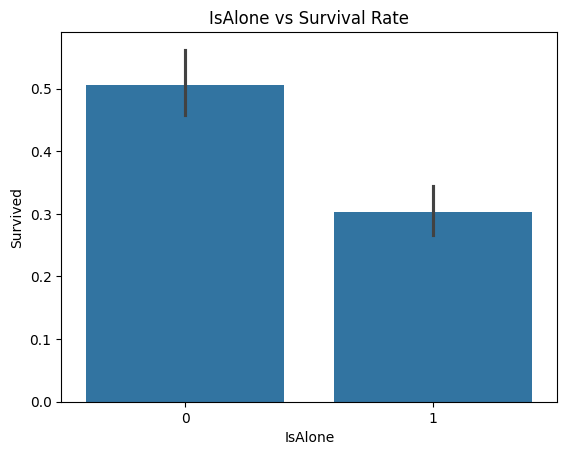

In [33]:
sns.barplot(x="IsAlone", y="Survived", data=df)
plt.title("IsAlone vs Survival Rate")
plt.show()


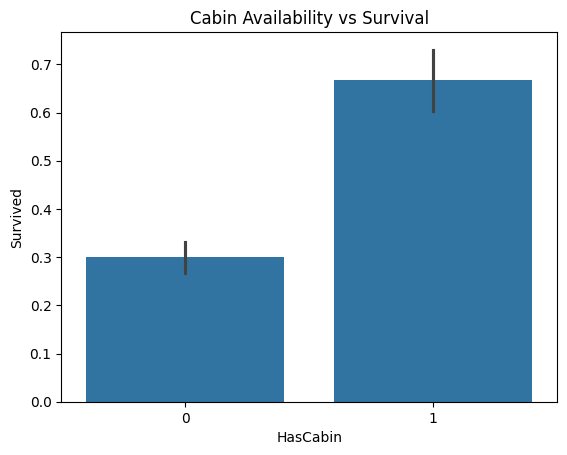

In [34]:
sns.barplot(x="HasCabin", y="Survived", data=df)
plt.title("Cabin Availability vs Survival")
plt.show()


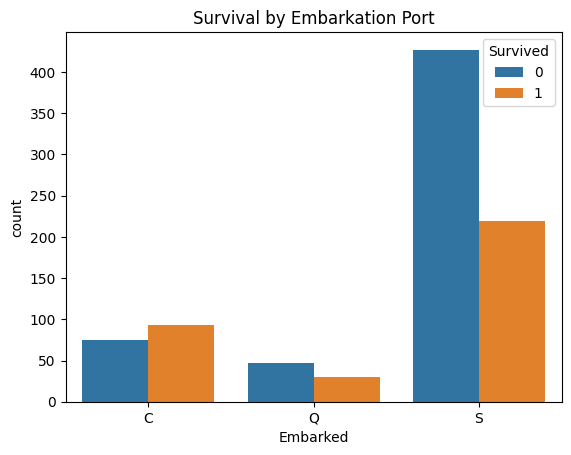

In [35]:
sns.countplot(x="Embarked", hue="Survived", data=df)
plt.title("Survival by Embarkation Port")
plt.show()


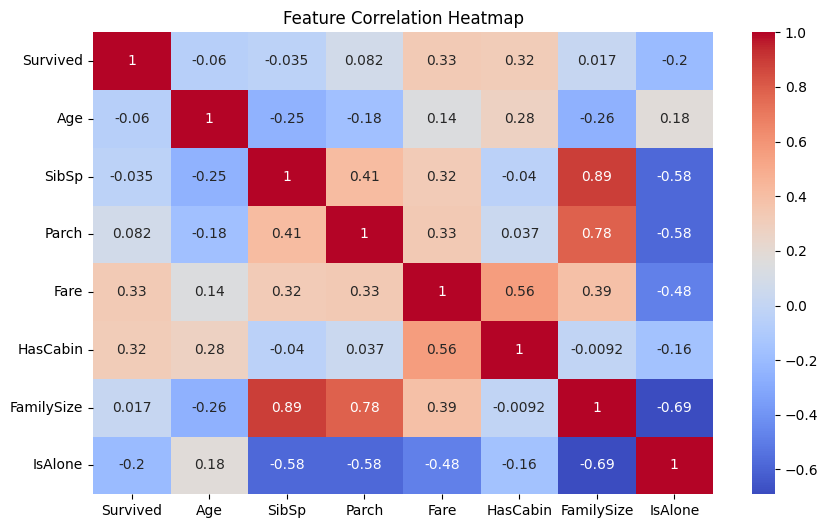

In [36]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


In [37]:
numeric_features = ["Age", "Fare", "FamilySize"]

corr = df[numeric_features + ["Survived"]].corr()
print(corr["Survived"].sort_values(ascending=False))


Survived      1.000000
Fare          0.329628
FamilySize    0.016639
Age          -0.059579
Name: Survived, dtype: float64


In [38]:
categorical_features = ["Sex", "Pclass", "Embarked", "IsAlone", "HasCabin", "Title"]

for col in categorical_features:
    print("\n", col)
    print(df.groupby(col)["Survived"].mean().sort_values(ascending=False))



 Sex
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

 Pclass
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

 Embarked
Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

 IsAlone
IsAlone
0    0.505650
1    0.303538
Name: Survived, dtype: float64

 HasCabin
HasCabin
1    0.666667
0    0.299854
Name: Survived, dtype: float64

 Title
Title
Mrs       0.793651
Miss      0.702703
Master    0.575000
Rare      0.347826
Mr        0.156673
Name: Survived, dtype: float64


/tmp/ipython-input-2683616001.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby(col)["Survived"].mean().sort_values(ascending=False))


In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df[["Age", "Fare", "FamilySize"]].dropna()

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [
    variance_inflation_factor(X.values, i)
    for i in range(len(X.columns))
]

print(vif_data)


      Feature       VIF
0         Age  5.034724
1        Fare  8.645264
2  FamilySize  3.105100


In [40]:
final_features = [
    "Sex",
    "Pclass",
    "Age",
    "Fare",
    "FamilySize",
    "IsAlone",
    "HasCabin",
    "Embarked",
    "Title"
]

X = df[final_features]
y = df["Survived"]


In [41]:
final_features = [
    "Sex",
    "Pclass",
    "Age",
    "Fare",
    "FamilySize",
    "IsAlone",
    "HasCabin",
    "Embarked",
    "Title"
]

X = df[final_features]
y = df["Survived"]


In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [43]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression


In [44]:
numeric_features = ["Age", "Fare", "FamilySize"]
categorical_features = [
    "Sex", "Pclass", "IsAlone", "HasCabin", "Embarked", "Title"
]


In [45]:
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median"))
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(drop="first"))
])


In [46]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)


In [47]:
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000))
])


In [48]:
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Age', 'Fare',
                                                   'FamilySize']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['Sex', 'Pclass', 'IsAlone',
                                                   'HasCabin', 'Embarked',
                                                   'Title'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [49]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8156424581005587

Confusion Matrix:
 [[96 14]
 [19 50]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       110
           1       0.78      0.72      0.75        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.82      0.81       179



In [50]:
feature_names = model.named_steps["preprocessor"]\
    .get_feature_names_out()


In [51]:
coefficients = model.named_steps["classifier"].coef_[0]

coef_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coefficients
}).sort_values(by="Coefficient", ascending=False)

coef_df


,Feature,Coefficient
7,cat__HasCabin_1,1.064262
12,cat__Title_Mrs,0.579826
1,num__Fare,0.476818
8,cat__Embarked_Q,0.261736
0,num__Age,-0.037888
6,cat__IsAlone_1,-0.078447
4,cat__Pclass_2,-0.093166
10,cat__Title_Miss,-0.223385
9,cat__Embarked_S,-0.299309
2,num__FamilySize,-0.452224


In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [53]:
rf_model = Pipeline(steps=[
    ("preprocessor", preprocessor),   # same preprocessor
    ("classifier", RandomForestClassifier(
        n_estimators=200,
        max_depth=8,
        random_state=42,
        class_weight="balanced"
    ))
])


In [54]:
rf_model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Age', 'Fare',
                                                   'FamilySize']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['Sex', 'Pclass', 'IsAlone',
                                                   'HasCabin', 'Embarked',
                                                   'Title'])])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced', max_depth=8,
                                        n_estimators=200, random_state=42))])

In [55]:
rf_pred = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, rf_pred))
print("\nClassification Report:\n", classification_report(y_test, rf_pred))


Random Forest Accuracy: 0.8156424581005587

Confusion Matrix:
 [[93 17]
 [16 53]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85       110
           1       0.76      0.77      0.76        69

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [56]:
feature_names = rf_model.named_steps["preprocessor"]\
    .get_feature_names_out()


In [57]:
importances = rf_model.named_steps["classifier"].feature_importances_

importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

importance_df.head(10)


,Feature,Importance
11,cat__Title_Mr,0.183840
1,num__Fare,0.177373
3,cat__Sex_male,0.141687
0,num__Age,0.140652
2,num__FamilySize,0.070513
7,cat__HasCabin_1,0.064126
5,cat__Pclass_3,0.055661
10,cat__Title_Miss,0.050771
12,cat__Title_Mrs,0.038892
9,cat__Embarked_S,0.022513


In [58]:
from sklearn.model_selection import cross_val_score


In [59]:
cv_scores_lr = cross_val_score(
    model,              # Logistic Regression pipeline
    X,
    y,
    cv=5,
    scoring="roc_auc"
)

print("Logistic Regression CV ROC-AUC scores:", cv_scores_lr)
print("Mean ROC-AUC:", cv_scores_lr.mean())


Logistic Regression CV ROC-AUC scores: [0.85546772 0.83937166 0.87520053 0.86423797 0.912977  ]
Mean ROC-AUC: 0.8694509757705162


In [60]:
cv_scores_rf = cross_val_score(
    rf_model,           # Random Forest pipeline
    X,
    y,
    cv=5,
    scoring="roc_auc"
)

print("Random Forest CV ROC-AUC scores:", cv_scores_rf)
print("Mean ROC-AUC:", cv_scores_rf.mean())


Random Forest CV ROC-AUC scores: [0.87773386 0.80541444 0.88716578 0.86356952 0.91789656]
Mean ROC-AUC: 0.8703560298543757


In [61]:
from sklearn.metrics import roc_curve, auc


In [65]:
# Logistic Regression ROC
y_prob_lr = model.predict_proba(X_test)[:, 1]

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Random Forest ROC
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)



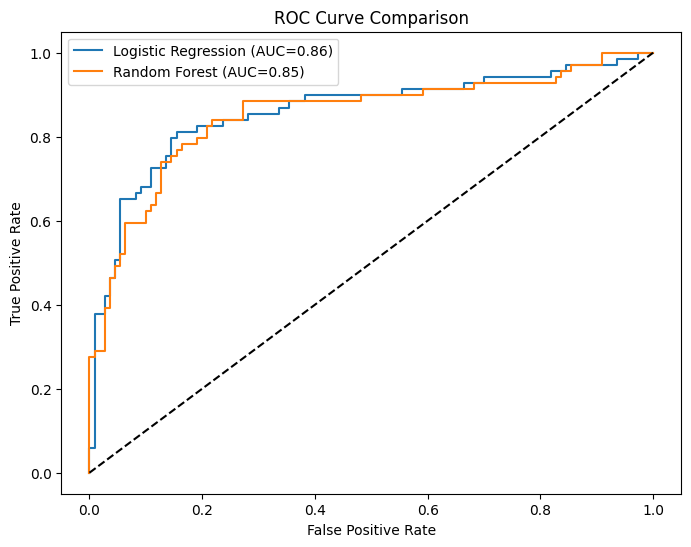

In [66]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC={roc_auc_lr:.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC={roc_auc_rf:.2f})")
plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()


In [68]:
from sklearn.model_selection import GridSearchCV

param_grid_lr = {
    "classifier__C": [0.01, 0.1, 1, 5, 10],
    "classifier__penalty": ["l1", "l2"],
    "classifier__solver": ["liblinear"]
}

grid_lr = GridSearchCV(
    estimator=model,              # Logistic pipeline
    param_grid=param_grid_lr,
    scoring="roc_auc",
    cv=5,
    n_jobs=-1
)

grid_lr.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median'))]),
                                                                         ['Age',
                                                                          'Fare',
                                                                          'FamilySize']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(drop='first'))]),
                                                                         ['Sex',
                                                                          'Pclass',
                                                                          'IsAlone',
                                                                          'HasCabin',
                                                                          'Embarked',
                                                                          'Title'])])),
                                       ('classifier',
                                        LogisticRegression(max_iter=1000))]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.01, 0.1, 1, 5, 10],
                         'classifier__penalty': ['l1', 'l2'],
                         'classifier__solver': ['liblinear']},
             scoring='roc_auc')

In [69]:
print("Best LR Params:", grid_lr.best_params_)
print("Best CV ROC-AUC:", grid_lr.best_score_)


Best LR Params: {'classifier__C': 0.1, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}
Best CV ROC-AUC: 0.8725343824873605


In [70]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint


In [71]:
param_dist_rf = {
    "classifier__n_estimators": randint(100, 500),
    "classifier__max_depth": randint(3, 15),
    "classifier__min_samples_split": randint(2, 10),
    "classifier__min_samples_leaf": randint(1, 5),
    "classifier__max_features": ["sqrt", "log2"]
}


In [72]:
random_rf = RandomizedSearchCV(
    estimator=rf_model,            # RF pipeline
    param_distributions=param_dist_rf,
    n_iter=30,
    scoring="roc_auc",
    cv=5,
    random_state=42,
    n_jobs=-1
)

random_rf.fit(X_train, y_train)


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median'))]),
                                                                               ['Age',
                                                                                'Fare',
                                                                                'FamilySize']),
                                                                              ('cat',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('onehot',
                                                                                                OneHotEncoder(drop='first'))]),
                                                                               ['Sex',
                                                                                'Pclass',
                                                                                'IsAlone',
                                                                                'HasCabin',...
                                        'classifier__min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7c81c7c2a4b0>,
                                        'classifier__min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7c81c4618770>,
                                        'classifier__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7c81c461be30>},
                   random_state=42, scoring='roc_auc')

In [73]:
print("Best RF Params:", random_rf.best_params_)
print("Best CV ROC-AUC:", random_rf.best_score_)


Best RF Params: {'classifier__max_depth': 14, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 6, 'classifier__n_estimators': 363}
Best CV ROC-AUC: 0.8784380772194252


In [74]:
best_lr = grid_lr.best_estimator_

y_pred_lr = best_lr.predict(X_test)
y_prob_lr = best_lr.predict_proba(X_test)[:, 1]


In [75]:
best_rf = random_rf.best_estimator_

y_pred_rf = best_rf.predict(X_test)
y_prob_rf = best_rf.predict_proba(X_test)[:, 1]


In [76]:
from sklearn.metrics import roc_auc_score

print("Tuned LR Test ROC-AUC:", roc_auc_score(y_test, y_prob_lr))
print("Tuned RF Test ROC-AUC:", roc_auc_score(y_test, y_prob_rf))


Tuned LR Test ROC-AUC: 0.8472990777338603
Tuned RF Test ROC-AUC: 0.8521739130434783
